# Одномерная линейная регрессия

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Рассмотрим приближенную линейную функцию $y=2x-1+\varepsilon(x)$. 

Задаем случайный массив $X$ значений на отрезке $[-1,1)$:

In [2]:
N = 100
X = 2*np.random.random(N) - 1

In [3]:
Y0 = 2 * X -1

Добавим случайную ошибку со значениями $[-0.5, 0.5)$:

In [4]:
E = 0.5*np.random.normal(size=N)
Y = Y0 + E

In [5]:
M = 40
temp_x = 1 + 0.5 * np.random.random(M)
temp_y = -5 + 0.5 * np.random.random(M)

In [6]:
temp = X
X = np.empty(N+M, 'd')
X[:N] = temp[:]
X[N:] = temp_x

In [7]:
temp = Y
Y = np.empty(N+M, 'd')
Y[:N] = temp[:]
Y[N:] = temp_y

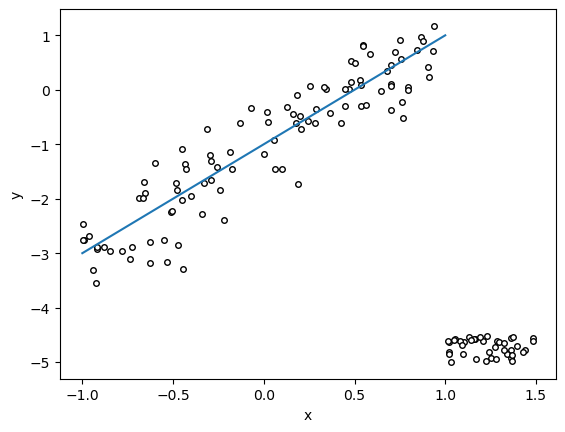

In [8]:
plt.scatter(X, Y, s=16, c='w', edgecolors='k')
plt.plot([-1,1], [-3,1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
import mltools.estimators as estimators
import mltools.aggfuncs as aggfuncs
import mltools.funcs as funcs
import mltools.scores as scores

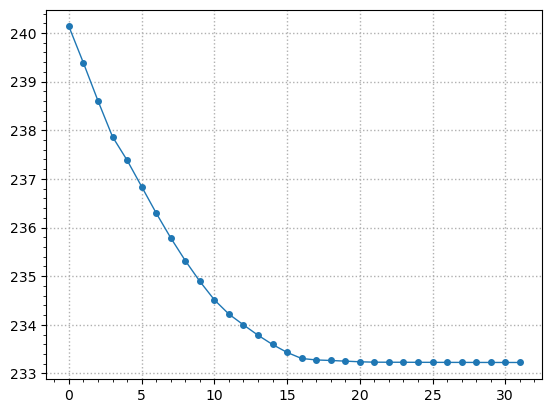

In [10]:
irls = estimators.IRLS(funcs.SoftAbs(0.001))
irls.fit(X[:,None], Y)

plt.plot(irls.qvals, marker='o', markersize=4, linewidth=1.0)
plt.minorticks_on()
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [11]:
Y_p = irls.model.evaluate(X[:,None])

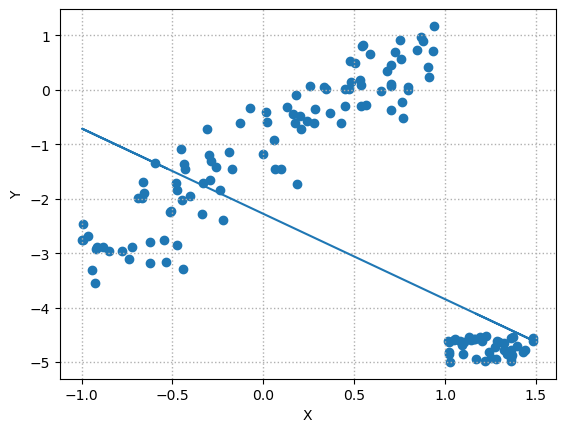

In [12]:
plt.scatter(X, Y)
plt.plot(X, Y_p)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [13]:
aggfunc = aggfuncs.MMean(funcs.SoftAbs(0.001))
mirls = estimators.MIRLS(aggfunc)
mirls.fit(X[:,None], Y)

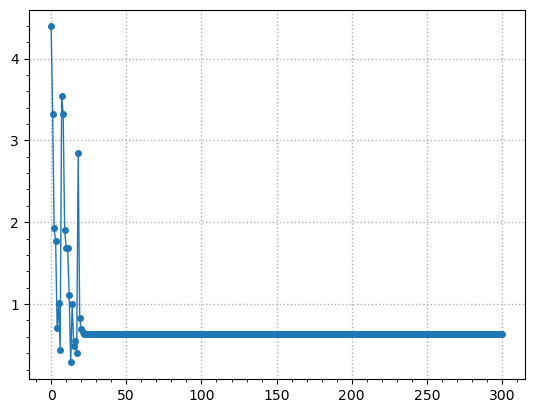

In [14]:
plt.plot(mirls.qvals, marker='o', markersize=4, linewidth=1.0)
plt.minorticks_on()
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [15]:
Y2_p = mirls.model.evaluate(X[:,None])

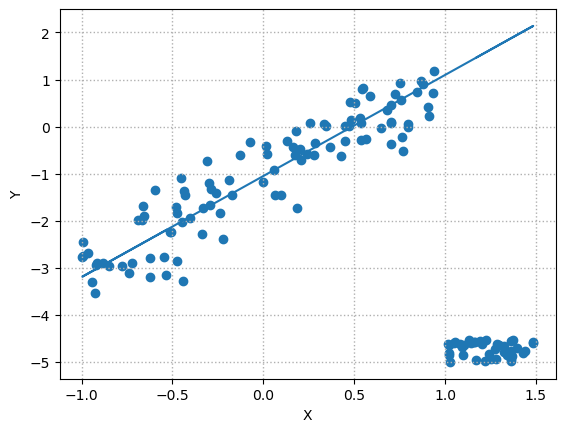

In [16]:
plt.scatter(X, Y)
plt.plot(X, Y2_p)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [21]:
alpha=0.7
rho_func = funcs.SoftQuantileFunc(funcs.SoftAbs(0.001), alpha)
cmean = aggfuncs.CMMean(rho_func)
mirls2 = estimators.MIRLS(cmean)
mirls2.fit(X[:,None], Y)

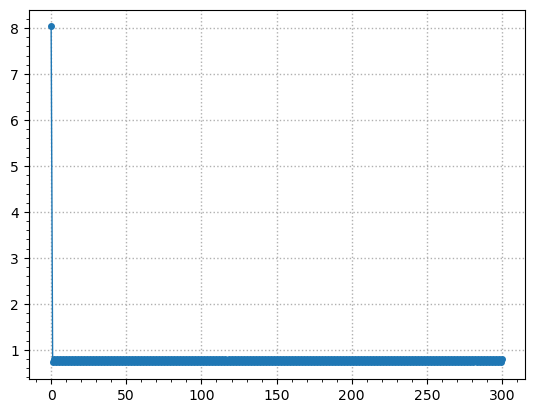

In [22]:
plt.plot(mirls2.qvals, marker='o', markersize=4, linewidth=1.0)
plt.minorticks_on()
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

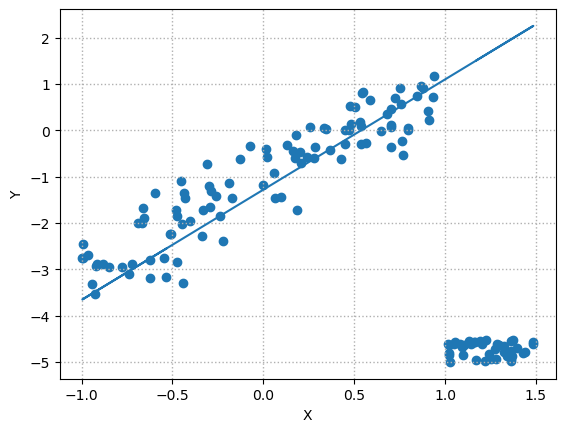

In [23]:
Y3_p = mirls2.model.evaluate(X[:,None])
plt.scatter(X, Y)
plt.plot(X, Y3_p)
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()

In [24]:
import mlgrad.funcs as funcs
from mlgrad.af import averaging_function
from mlgrad.regr import m_regression_irls, regression
from mlgrad.models import LinearModel

In [25]:
aggfunc = averaging_function("WM", funcs.QuantileFunc(0.7, funcs.SoftAbs_Sqrt(0.001)))
mod = LinearModel(1)
# regression(X[:,None], Y, mod)
regr = m_regression_irls(X[:,None], Y, mod, agg_func=aggfunc)

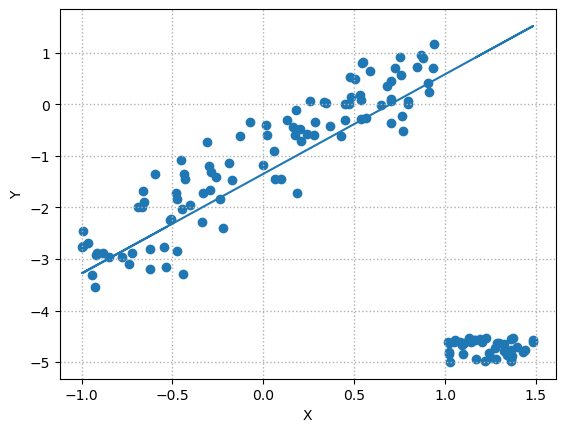

In [26]:
plt.scatter(X, Y)
plt.plot(X, mod.evaluate_all(X[:None]))
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(1, linewidth=1.0, linestyle=":")
plt.show()